In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import pickle
import numpy as np

import py21cmfast as p21c
from astropy.cosmology import Planck18
from scipy import interpolate

sys.path.append("..")
from dm21cm.dm_params import DMParams
from dm21cm.evolve import evolve
import dm21cm.physics as phys

sys.path.append(os.environ['DH_DIR'])
from darkhistory.main import evolve as evolve_DH

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


## DMParam

In [2]:
dm_params = DMParams(
    mode = 'decay',
    primary = 'phot_delta',
    m_DM = 1e10,
    lifetime = 1e25,
)

## DarkHistory

In [3]:
from darkhistory.config import load_data
load_data('dep_tf', prefix='/n/holyscratch01/iaifi_lab/yitians/darkhistory/DHdata_v1_1_zf01')
load_data('ics_tf', prefix='/n/holyscratch01/iaifi_lab/yitians/darkhistory/DHdata_v1_1_zf01');

****** Loading transfer functions... ******
Using data at /n/holyscratch01/iaifi_lab/yitians/darkhistory/DHdata_v1_1_zf01
    for propagating photons...   Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading transfer functions... ******
    for inverse Compton (Thomson)...  Done!
    for inverse Compton (relativistic)...  Done!
    for inverse Compton (energy loss)...  Done!
****** Loading complete! ******


In [4]:
run_name = 'dhc_phph_nobath'

soln = evolve_DH(
    DM_process=dm_params.mode, mDM=dm_params.m_DM,
    primary=dm_params.primary,
    sigmav=dm_params.sigmav, lifetime=dm_params.lifetime,
    struct_boost=dm_params.struct_boost,
    start_rs=50, end_rs=4.+1, coarsen_factor=12, verbose=1,
    # use fake reionization to get case-A recomb. coeff.
    reion_switch=True, reion_rs=46.,
    photoion_rate_func=[lambda x: 0., lambda x: 0., lambda x: 0.],
    photoheat_rate_func=[lambda x: 0., lambda x: 0., lambda x: 0.],
    cross_check_21cmfast=True,
    debug_no_bath=True,
)

pickle.dump(soln, open(f"run_info/{run_name}_dh_soln.p", 'wb'))

Loading time: 0.022 s


  0%|          | 0/192 [00:00<?, ?it/s]WARNING:root:Cross checking 21cmfast!


Initialization time: 0.076 s


  1%|          | 2/192 [00:00<00:17, 11.10it/s]

rs =  50
lowengelec_spec_at_rs.toteng()= 1.3832263567581012e-09
lowengphot_spec_at_rs.toteng()= 1.3985525350169012e-07
x_vec_for_f =  [9.99764369e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.571824178608139e-17
dt =  27695713173355.824
highengdep_at_rs =  [ 1.36082417e-23  1.03501821e-23  7.87677500e-26 -5.85748813e-26]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([3.60701256e-06, 1.10143287e-07, 2.47674960e-06, 1.68943341e-06,
       2.14377462e-06]), array([ 2.67584930e-08,  0.00000000e+00,  2.03520250e-08,  1.54884543e-10,
       -1.15178404e-10]))
-----------


  2%|▏         | 4/192 [00:00<00:16, 11.73it/s]

rs =  49.40358564309652
lowengelec_spec_at_rs.toteng()= 1.3693710239436863e-09
lowengphot_spec_at_rs.toteng()= 1.40284029356598e-07
x_vec_for_f =  [9.99764817e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.5162449369564233e-17
dt =  28200195001754.566
highengdep_at_rs =  [ 1.32617537e-23  1.00885009e-23  7.67301840e-26 -5.66468562e-26]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([3.55421886e-06, 1.08276283e-07, 2.43911075e-06, 1.66393173e-06,
       2.11112615e-06]), array([ 2.60771782e-08,  0.00000000e+00,  1.98374696e-08,  1.50877986e-10,
       -1.11387242e-10]))
-----------
rs =  48.81428548789546
lowengelec_spec_at_rs.toteng()= 7.610561441463147e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99765262e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.462630960977944e-17
dt =  23809357463425.863
highengdep_at_rs =  [ 1.46406044e-24  1.15854278e-24  1.09945530e-26 -1.19785901e-26]
compute_fs_method =  no_He
cro

  4%|▍         | 8/192 [00:00<00:08, 20.66it/s]

rs =  47.85245121840553
lowengelec_spec_at_rs.toteng()= 7.697049119393205e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99766001e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.377864527724555e-17
dt =  24532831364863.047
highengdep_at_rs =  [ 1.44648521e-24  1.14482685e-24  1.08521604e-26 -1.17178134e-26]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([1.69467288e-09, 7.39288985e-11, 1.74998203e-09, 1.98179929e-09,
       7.80974567e-10]), array([ 2.89594917e-09,  0.00000000e+00,  2.29201125e-09,  2.17266687e-11,
       -2.34597573e-11]))
-----------
rs =  47.37866457267875
lowengelec_spec_at_rs.toteng()= 7.740724792219811e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99766367e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.3373417357884309e-17
dt =  24902755304745.816
highengdep_at_rs =  [ 1.43726422e-24  1.13762885e-24  1.07784755e-26 -1.15821142e-26]
compute_fs_method =  no_He
cross_check =  False


  6%|▋         | 12/192 [00:00<00:06, 25.72it/s]

rs =  45.52996540218867
lowengelec_spec_at_rs.toteng()= 7.918366920239282e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99767835e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.1868228873402022e-17
dt =  26438970432961.918
highengdep_at_rs =  [ 1.39737045e-24  1.10647513e-24  1.04653945e-26 -1.10024719e-26]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([1.61767763e-09, 7.04558158e-11, 1.67104978e-09, 1.89122795e-09,
       7.45677144e-10]), array([ 2.79761851e-09,  0.00000000e+00,  2.21522883e-09,  2.09523404e-11,
       -2.20276012e-11]))
-----------
rs =  45.07917366553335
lowengelec_spec_at_rs.toteng()= 7.96352572843456e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99768214e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.1519186017874416e-17
dt =  26837582238340.07
highengdep_at_rs =  [ 1.38661788e-24  1.09807534e-24  1.03819200e-26 -1.08480315e-26]
compute_fs_method =  no_He
cross_check =  False
f

  8%|▊         | 16/192 [00:00<00:06, 28.89it/s]

rs =  44.19093585485084
lowengelec_spec_at_rs.toteng()= 8.054759593756705e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99768963e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.0851594302145472e-17
dt =  27652893085021.094
highengdep_at_rs =  [ 1.36413910e-24  1.08051174e-24  1.02095099e-26 -1.05272546e-26]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([1.57328557e-09, 6.84534508e-11, 1.62553985e-09, 1.83901162e-09,
       7.25325872e-10]), array([ 2.73108739e-09,  0.00000000e+00,  2.16324859e-09,  2.04400442e-11,
       -2.10761879e-11]))
-----------
rs =  43.753401836485985
lowengelec_spec_at_rs.toteng()= 8.100840155722319e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99769334e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.0532450518970158e-17
dt =  28069773913513.785
highengdep_at_rs =  [ 1.35240152e-24  1.07133901e-24  1.01205119e-26 -1.03607825e-26]
compute_fs_method =  no_He
cross_check =  Fals

 10%|█         | 20/192 [00:00<00:05, 30.89it/s]

f_raw =  (array([1.51609533e-09, 6.58756726e-11, 1.56690435e-09, 1.77183533e-09,
       6.99108398e-10]), array([ 2.63295996e-09,  0.00000000e+00,  2.08655018e-09,  1.97041955e-11,
       -1.96926489e-11]))
-----------
rs =  42.04615916912139
lowengelec_spec_at_rs.toteng()= 8.288318994536086e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99770793e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  9.347015053203633e-18
dt =  29800985198833.66
highengdep_at_rs =  [ 1.30199298e-24  1.03193431e-24  9.74515426e-27 -9.65270612e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([1.50214559e-09, 6.52472267e-11, 1.55260122e-09, 1.75546599e-09,
       6.92713664e-10]), array([ 2.60666715e-09,  0.00000000e+00,  2.06599370e-09,  1.95103768e-11,
       -1.93252901e-11]))
-----------
rs =  41.62986056348653
lowengelec_spec_at_rs.toteng()= 8.335992267303657e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99771152e-01 8.11258278e-02 5.43939893e-1

 12%|█▎        | 24/192 [00:00<00:05, 32.24it/s]

f_raw =  (array([1.47465412e-09, 6.40090856e-11, 1.52441226e-09, 1.72322476e-09,
       6.80111437e-10]), array([ 2.55188223e-09,  0.00000000e+00,  2.02315481e-09,  1.91104431e-11,
       -1.85637772e-11]))
-----------
rs =  40.80958784774684
lowengelec_spec_at_rs.toteng()= 8.432323745340287e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99771862e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  8.546348100914048e-18
dt =  31168988215132.87
highengdep_at_rs =  [ 1.26038459e-24  9.99397203e-25  9.44237282e-27 -9.07531588e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([1.46110974e-09, 6.33992651e-11, 1.51052376e-09, 1.70734946e-09,
       6.73902732e-10]), array([ 2.52336471e-09,  0.00000000e+00,  2.00085247e-09,  1.89041904e-11,
       -1.81693206e-11]))
-----------
rs =  40.40553252252163
lowengelec_spec_at_rs.toteng()= 8.480987991699757e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99772214e-01 8.11258278e-02 5.43939893e-1

 15%|█▍        | 28/192 [00:01<00:04, 33.23it/s]

rs =  39.21721178812954
lowengelec_spec_at_rs.toteng()= 8.629011759091932e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99773254e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  7.584450001002506e-18
dt =  33091004710399.652
highengdep_at_rs =  [ 1.19950920e-24  9.51778519e-25  9.00853420e-27 -8.23977623e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([1.40824451e-09, 6.10202178e-11, 1.45631220e-09, 1.64544463e-09,
       6.49670115e-10]), array([ 2.40148856e-09,  0.00000000e+00,  1.90551704e-09,  1.80356197e-11,
       -1.64965207e-11]))
-----------
rs =  38.8289225625045
lowengelec_spec_at_rs.toteng()= 8.679040515369e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99773597e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  7.36139244842285e-18
dt =  33589719872946.152
highengdep_at_rs =  [ 1.18328185e-24  9.39082376e-25  8.89445290e-27 -8.01863003e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw 

 17%|█▋        | 32/192 [00:01<00:04, 33.98it/s]

rs =  38.06383939075044
lowengelec_spec_at_rs.toteng()= 8.776600731005179e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99774275e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  6.934764680873055e-18
dt =  34609775902411.99
highengdep_at_rs =  [ 1.16726742e-24  9.26547239e-25  8.77002093e-27 -7.81747916e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([1.36946370e-09, 5.92841757e-11, 1.41648418e-09, 1.59986904e-09,
       6.31867695e-10]), array([ 2.33693861e-09,  0.00000000e+00,  1.85500252e-09,  1.75581020e-11,
       -1.56510569e-11]))
-----------
rs =  37.68696969381232
lowengelec_spec_at_rs.toteng()= 8.825542960128321e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99774610e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  6.730814277451987e-18
dt =  35131344132602.76
highengdep_at_rs =  [ 1.16046068e-24  9.21217072e-25  8.71550519e-27 -7.73580684e-27]
compute_fs_method =  no_He
cross_check =  False
f_r

 19%|█▉        | 36/192 [00:01<00:04, 34.43it/s]

rs =  36.21643711887322
lowengelec_spec_at_rs.toteng()= 9.024500682787283e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99775932e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  5.9732559159284004e-18
dt =  37297284931602.01
highengdep_at_rs =  [ 1.13093853e-24  8.98089459e-25  8.48421864e-27 -7.38638030e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([1.30672816e-09, 5.64877607e-11, 1.35197987e-09, 1.52597598e-09,
       6.03037555e-10]), array([ 2.26420600e-09,  0.00000000e+00,  1.79802836e-09,  1.69859089e-11,
       -1.47879714e-11]))
-----------
rs =  35.85785853353785
lowengelec_spec_at_rs.toteng()= 9.075050955411454e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99776257e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  5.797583343050626e-18
dt =  37859290493755.49
highengdep_at_rs =  [ 1.12296374e-24  8.91839700e-25  8.42297696e-27 -7.29314197e-27]
compute_fs_method =  no_He
cross_check =  False
f_

 21%|██        | 40/192 [00:01<00:04, 34.63it/s]

rs =  35.15131706061941
lowengelec_spec_at_rs.toteng()= 9.17714403493629e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99776901e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  5.461585764310004e-18
dt =  39008796369636.67
highengdep_at_rs =  [ 1.10627150e-24  8.78755469e-25  8.29622500e-27 -7.09932222e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([1.27054146e-09, 5.48759677e-11, 1.31476985e-09, 1.48341514e-09,
       5.86408742e-10]), array([ 2.21482116e-09,  0.00000000e+00,  1.75932056e-09,  1.66095345e-11,
       -1.42132641e-11]))
-----------
rs =  34.80328421843507
lowengelec_spec_at_rs.toteng()= 9.228692545089695e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99777219e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  5.300961334901166e-18
dt =  39596552848001.59
highengdep_at_rs =  [ 1.09754535e-24  8.71914133e-25  8.23066631e-27 -6.99865681e-27]
compute_fs_method =  no_He
cross_check =  False
f_ra

 25%|██▌       | 48/192 [00:01<00:04, 35.04it/s]

rs =  32.46165155363833
lowengelec_spec_at_rs.toteng()= 9.599176722671114e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99779396e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  4.301359949990171e-18
dt =  43966038748190.4
highengdep_at_rs =  [ 1.02894358e-24  8.18104863e-25  7.72865826e-27 -6.21980327e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([1.17910707e-09, 5.08074153e-11, 1.22073962e-09, 1.37607978e-09,
       5.44394740e-10]), array([ 2.06000607e-09,  0.00000000e+00,  1.63789445e-09,  1.54732322e-11,
       -1.24524150e-11]))
-----------
rs =  32.14024906300826
lowengelec_spec_at_rs.toteng()= 9.653517233161843e-11
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99779699e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  4.17485759015101e-18
dt =  44628375614402.51
highengdep_at_rs =  [ 1.01801225e-24  8.09527232e-25  7.65047103e-27 -6.09739005e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw

 27%|██▋       | 52/192 [00:01<00:03, 35.02it/s]

rs =  29.977790583851938
lowengelec_spec_at_rs.toteng()= 1.0044244538481194e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99781770e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  3.387605398469269e-18
dt =  49552276451687.53
highengdep_at_rs =  [ 9.32867771e-25  7.42692117e-25  7.05395783e-27 -5.15564205e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([1.09459728e-09, 4.70522233e-11, 1.13381740e-09, 1.27714041e-09,
       5.05566128e-10]), array([ 1.86765660e-09,  0.00000000e+00,  1.48691366e-09,  1.41224419e-11,
       -1.03219011e-11]))
-----------
rs =  29.680980776091033
lowengelec_spec_at_rs.toteng()= 1.0099367269882417e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99782058e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  3.2879764248207766e-18
dt =  50298648457953.086
highengdep_at_rs =  [ 9.27606168e-25  7.38558466e-25  7.01264413e-27 -5.10378453e-27]
compute_fs_method =  no_He
cross_check =  Fal

 29%|██▉       | 56/192 [00:01<00:03, 35.01it/s]

f_raw =  (array([1.06396384e-09, 4.57016863e-11, 1.10224111e-09, 1.24108404e-09,
       4.91461532e-10]), array([ 1.83539562e-09,  0.00000000e+00,  1.46156383e-09,  1.38705533e-11,
       -1.00065192e-11]))
-----------
rs =  28.808067522103787
lowengelec_spec_at_rs.toteng()= 1.0266734790221026e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99782913e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  3.006327786375613e-18
dt =  52605805165832.06
highengdep_at_rs =  [ 9.11058377e-25  7.25553363e-25  6.88430282e-27 -4.94310334e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([1.05395135e-09, 4.52604268e-11, 1.09192001e-09, 1.22930635e-09,
       4.86851536e-10]), array([ 1.82399290e-09,  0.00000000e+00,  1.45260086e-09,  1.37827825e-11,
       -9.89638605e-12]))
-----------
rs =  28.522839130795834
lowengelec_spec_at_rs.toteng()= 1.0323226386805211e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99783195e-01 8.11258278e-02 5.4393989

 31%|███▏      | 60/192 [00:01<00:03, 35.16it/s]

rs =  27.68398665127555
lowengelec_spec_at_rs.toteng()= 1.049484867690216e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99784030e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.6679632649121484e-18
dt =  55847242441635.21
highengdep_at_rs =  [ 8.86405526e-25  7.06168016e-25  6.69791588e-27 -4.70797711e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([1.01487315e-09, 4.35389257e-11, 1.05163569e-09, 1.18337507e-09,
       4.68859523e-10]), array([ 1.77463643e-09,  0.00000000e+00,  1.41379025e-09,  1.34096248e-11,
       -9.42564939e-12]))
-----------
rs =  27.409887773540152
lowengelec_spec_at_rs.toteng()= 1.0552781723842493e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99784305e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.5894988599566043e-18
dt =  56688300944871.39
highengdep_at_rs =  [ 8.79757968e-25  7.00939073e-25  6.64846823e-27 -4.64529325e-27]
compute_fs_method =  no_He
cross_check =  False

 33%|███▎      | 64/192 [00:02<00:03, 34.98it/s]

rs =  26.869804699088487
lowengelec_spec_at_rs.toteng()= 1.0669754183766409e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99784849e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.439425062718323e-18
dt =  58408558235668.4
highengdep_at_rs =  [ 8.65857619e-25  6.90003073e-25  6.54601564e-27 -4.51505404e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([9.86558601e-10, 4.22923061e-11, 1.02244558e-09, 1.15013159e-09,
       4.55823751e-10]), array([ 1.73349830e-09,  0.00000000e+00,  1.38142707e-09,  1.31055115e-11,
       -9.03940596e-12]))
-----------
rs =  26.603767028800487
lowengelec_spec_at_rs.toteng()= 1.0728799689338846e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99785119e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.3676819324821817e-18
dt =  59288140012040.12
highengdep_at_rs =  [ 8.58597747e-25  6.84290420e-25  6.49297060e-27 -4.44744309e-27]
compute_fs_method =  no_He
cross_check =  False

 35%|███▌      | 68/192 [00:02<00:03, 34.93it/s]

f_raw =  (array([9.50084583e-10, 4.06873401e-11, 9.84841600e-10, 1.10735423e-09,
       4.39032113e-10]), array([ 1.67279200e-09,  0.00000000e+00,  1.33365047e-09,  1.26656549e-11,
       -8.47732364e-12]))
-----------
rs =  25.565697203877303
lowengelec_spec_at_rs.toteng()= 1.0968782835605163e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99786183e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.1011974966556193e-18
dt =  62940758240516.18
highengdep_at_rs =  [ 8.27408392e-25  6.59741423e-25  6.26818349e-27 -4.15972097e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([9.41188519e-10, 4.02960411e-11, 9.75669579e-10, 1.09692871e-09,
       4.34936728e-10]), array([ 1.65652067e-09,  0.00000000e+00,  1.32084146e-09,  1.25492751e-11,
       -8.32800809e-12]))
-----------
rs =  25.312571488987434
lowengelec_spec_at_rs.toteng()= 1.102974480197636e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99786445e-01 8.11258278e-02 5.4393989

 38%|███▊      | 72/192 [00:02<00:03, 34.93it/s]

rs =  24.813813830984653
lowengelec_spec_at_rs.toteng()= 1.1152850893057964e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99786965e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.921208549785448e-18
dt =  65826961693266.195
highengdep_at_rs =  [ 8.01652675e-25  6.39462317e-25  6.08575545e-27 -3.92495230e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([9.15020401e-10, 3.91453743e-11, 9.48688897e-10, 1.06627990e-09,
       4.22890267e-10]), array([ 1.60495620e-09,  0.00000000e+00,  1.28024148e-09,  1.21840433e-11,
       -7.85798728e-12]))
-----------
rs =  24.568132505925405
lowengelec_spec_at_rs.toteng()= 1.1215001657123164e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99787222e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.8647060905361143e-18
dt =  66818109309448.88
highengdep_at_rs =  [ 7.92596231e-25  6.32330348e-25  6.02219208e-27 -3.84291674e-27]
compute_fs_method =  no_He
cross_check =  Fal

 40%|███▉      | 76/192 [00:02<00:03, 34.49it/s]

rs =  24.08404323686444
lowengelec_spec_at_rs.toteng()= 1.1340515492608843e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99787732e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.756637487739048e-18
dt =  68845342749028.305
highengdep_at_rs =  [ 7.73752005e-25  6.17488615e-25  5.89079616e-27 -3.67298412e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([8.89614775e-10, 3.80287468e-11, 9.22493201e-10, 1.03655048e-09,
       4.11195217e-10]), array([ 1.54909740e-09,  0.00000000e+00,  1.23624883e-09,  1.17937233e-11,
       -7.35353203e-12]))
-----------
rs =  23.845587363232124
lowengelec_spec_at_rs.toteng()= 1.1403885422823172e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99787985e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.7049750390798898e-18
dt =  69881879637580.25
highengdep_at_rs =  [ 7.63955821e-25  6.09772212e-25  5.82291637e-27 -3.58502113e-27]
compute_fs_method =  no_He
cross_check =  Fals

 42%|████▏     | 80/192 [00:02<00:03, 34.31it/s]

rs =  23.144292166301053
lowengelec_spec_at_rs.toteng()= 1.159583359520942e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99788735e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.5589265775657488e-18
dt =  73085948816812.28
highengdep_at_rs =  [ 7.34837979e-25  5.86832373e-25  5.62169470e-27 -3.32595852e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([8.56845837e-10, 3.65898284e-11, 8.88699425e-10, 9.98227571e-10,
       3.96109277e-10]), array([ 1.47118921e-09,  0.00000000e+00,  1.17487321e-09,  1.12549662e-11,
       -6.65876620e-12]))
-----------
rs =  22.915140758713918
lowengelec_spec_at_rs.toteng()= 1.165847240323326e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99788982e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.5130787775278772e-18
dt =  74186249989567.73
highengdep_at_rs =  [ 7.30668680e-25  5.83545061e-25  5.58962162e-27 -3.29280092e-27]
compute_fs_method =  no_He
cross_check =  False

 44%|████▍     | 84/192 [00:02<00:03, 34.34it/s]

rs =  22.463621957370773
lowengelec_spec_at_rs.toteng()= 1.1784891183309913e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99789471e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.4253886529343983e-18
dt =  76436732557773.61
highengdep_at_rs =  [ 7.21909923e-25  5.76637462e-25  5.52293240e-27 -3.22371982e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([8.32677171e-10, 3.55349669e-11, 8.63733447e-10, 9.69832734e-10,
       3.84964176e-10]), array([ 1.44530648e-09,  0.00000000e+00,  1.15446240e-09,  1.10572382e-11,
       -6.45407826e-12]))
-----------
rs =  22.241209858782945
lowengelec_spec_at_rs.toteng()= 1.1848676979106457e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99789714e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.3834681835059836e-18
dt =  77587414454849.36
highengdep_at_rs =  [ 7.17315483e-25  5.73013224e-25  5.48828719e-27 -3.18776439e-27]
compute_fs_method =  no_He
cross_check =  Fal

 46%|████▌     | 88/192 [00:02<00:03, 33.98it/s]

rs =  21.58709916692592
lowengelec_spec_at_rs.toteng()= 1.2042375538920253e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99790434e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.2649600557483725e-18
dt =  81144304804753.77
highengdep_at_rs =  [ 7.02641197e-25  5.61434393e-25  5.37897008e-27 -3.07404164e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([8.01544523e-10, 3.41768582e-11, 8.31572235e-10, 9.33292427e-10,
       3.70608308e-10]), array([ 1.40672935e-09,  0.00000000e+00,  1.12402495e-09,  1.07690171e-11,
       -6.15441368e-12]))
-----------
rs =  21.373365511807844
lowengelec_spec_at_rs.toteng()= 1.2107732162808016e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99790671e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.2277577676313746e-18
dt =  82365761831806.61
highengdep_at_rs =  [ 6.97444010e-25  5.57332456e-25  5.34068615e-27 -3.03412571e-27]
compute_fs_method =  no_He
cross_check =  Fals

 48%|████▊     | 92/192 [00:02<00:02, 34.08it/s]

rs =  20.95222577375537
lowengelec_spec_at_rs.toteng()= 1.2239649465403182e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99791141e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.1566033550434796e-18
dt =  84864039519894.98
highengdep_at_rs =  [ 6.86574773e-25  5.48752225e-25  5.26125657e-27 -2.95117738e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([7.78987853e-10, 3.31933623e-11, 8.08269258e-10, 9.06843610e-10,
       3.60207413e-10]), array([ 1.37456341e-09,  0.00000000e+00,  1.09863450e-09,  1.05333477e-11,
       -5.90843214e-12]))
-----------
rs =  20.744777993817202
lowengelec_spec_at_rs.toteng()= 1.2306216384045063e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99791374e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.1225878214652613e-18
dt =  86141415474347.44
highengdep_at_rs =  [ 6.80897166e-25  5.44269525e-25  5.22007861e-27 -2.90810938e-27]
compute_fs_method =  no_He
cross_check =  Fals

 50%|█████     | 96/192 [00:02<00:02, 33.98it/s]

rs =  19.542519265481843
lowengelec_spec_at_rs.toteng()= 1.271433515138596e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99792745e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  9.385028554450017e-19
dt =  94219146533448.86
highengdep_at_rs =  [ 6.43247645e-25  5.14532764e-25  4.95146964e-27 -2.62622198e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([7.28880279e-10, 3.10101497e-11, 7.56500538e-10, 8.48169512e-10,
       3.37104093e-10]), array([ 1.28781993e-09,  0.00000000e+00,  1.03012511e-09,  9.91313587e-12,
       -5.25785215e-12]))
-----------
rs =  19.3490289757246
lowengelec_spec_at_rs.toteng()= 1.2783838427670612e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99792968e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  9.109016252968814e-19
dt =  95637138942434.14
highengdep_at_rs =  [ 6.36347373e-25  5.09080975e-25  4.90294869e-27 -2.57514800e-27]
compute_fs_method =  no_He
cross_check =  False
f_

 52%|█████▏    | 100/192 [00:03<00:02, 33.82it/s]

rs =  18.77997689580483
lowengelec_spec_at_rs.toteng()= 1.2994958775977579e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99793632e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  8.328736319738032e-19
dt =  100020267339116.81
highengdep_at_rs =  [ 6.14511820e-25  4.91826176e-25  4.75058932e-27 -2.41450860e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([7.01763276e-10, 2.98295475e-11, 7.28482637e-10, 8.16463259e-10,
       3.24601913e-10]), array([ 1.23028911e-09,  0.00000000e+00,  9.84665172e-10,  9.51096155e-12,
       -4.83398940e-12]))
-----------
rs =  18.594036530499835
lowengelec_spec_at_rs.toteng()= 1.3066213945257912e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99793851e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  8.083789416624887e-19
dt =  101525441825552.19
highengdep_at_rs =  [ 6.06844154e-25  4.85766118e-25  4.69747428e-27 -2.35841987e-27]
compute_fs_method =  no_He
cross_check =  Fals

 54%|█████▍    | 104/192 [00:03<00:02, 34.00it/s]

rs =  18.227660553376957
lowengelec_spec_at_rs.toteng()= 1.3210068015209723e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99794285e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  7.615295302729857e-19
dt =  104603985728336.16
highengdep_at_rs =  [ 5.90904931e-25  4.73167322e-25  4.58763478e-27 -2.24230004e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([6.82116498e-10, 2.89745815e-11, 7.08182281e-10, 7.93512448e-10,
       3.15544199e-10]), array([ 1.18302672e-09,  0.00000000e+00,  9.47309041e-10,  9.18471689e-12,
       -4.48921766e-12]))
-----------
rs =  18.047188666709864
lowengelec_spec_at_rs.toteng()= 1.3282674091064236e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99794500e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  7.391330594389274e-19
dt =  106178038364858.92
highengdep_at_rs =  [ 5.82626470e-25  4.66623108e-25  4.53087041e-27 -2.18222476e-27]
compute_fs_method =  no_He
cross_check =  Fal

 56%|█████▋    | 108/192 [00:03<00:02, 33.46it/s]

rs =  17.516423517700044
lowengelec_spec_at_rs.toteng()= 1.34966673134667e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99795137e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  6.758187916572992e-19
dt =  111043525933330.42
highengdep_at_rs =  [ 5.70288036e-25  4.56862843e-25  4.44018162e-27 -2.09959980e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([6.56523732e-10, 2.78649883e-11, 6.81712564e-10, 7.63546278e-10,
       3.03734138e-10]), array([ 1.14175047e-09,  0.00000000e+00,  9.14666507e-10,  8.88950693e-12,
       -4.20352332e-12]))
-----------
rs =  17.342993581881235
lowengelec_spec_at_rs.toteng()= 1.356846567514562e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99795348e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  6.559430609669403e-19
dt =  112714330852534.75
highengdep_at_rs =  [ 5.66709965e-25  4.54030913e-25  4.41337893e-27 -2.07668432e-27]
compute_fs_method =  no_He
cross_check =  False


 58%|█████▊    | 112/192 [00:03<00:02, 33.31it/s]

rs =  17.001268093207766
lowengelec_spec_at_rs.toteng()= 1.3713324319036043e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99795764e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  6.179280351819666e-19
dt =  116131619312631.08
highengdep_at_rs =  [ 5.59207410e-25  4.48091626e-25  4.35762307e-27 -2.02898918e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([6.37863142e-10, 2.70577947e-11, 6.62401785e-10, 7.41676944e-10,
       2.95118627e-10]), array([ 1.11956640e-09,  0.00000000e+00,  8.97106009e-10,  8.72421982e-12,
       -4.06215667e-12]))
-----------
rs =  16.832938706146308
lowengelec_spec_at_rs.toteng()= 1.378639057411908e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99795971e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  5.99754863075904e-19
dt =  117878860471546.77
highengdep_at_rs =  [ 5.55278842e-25  4.44981019e-25  4.32864537e-27 -2.00418808e-27]
compute_fs_method =  no_He
cross_check =  False

 60%|██████    | 116/192 [00:03<00:02, 33.21it/s]

rs =  16.337884468855528
lowengelec_spec_at_rs.toteng()= 1.4008173452020978e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99796584e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  5.483797560918564e-19
dt =  123279636402158.58
highengdep_at_rs =  [ 5.42758786e-25  4.35065305e-25  4.23716208e-27 -1.92583859e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([6.13826546e-10, 2.60185251e-11, 6.37526744e-10, 7.13531817e-10,
       2.84021476e-10]), array([ 1.08663528e-09,  0.00000000e+00,  8.71026543e-10,  8.48304977e-12,
       -3.85564308e-12]))
-----------
rs =  16.176123236490625
lowengelec_spec_at_rs.toteng()= 1.4082972707166597e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99796786e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  5.322519885857208e-19
dt =  125134242123619.75
highengdep_at_rs =  [ 5.38333460e-25  4.31559717e-25  4.20510781e-27 -1.89836900e-27]
compute_fs_method =  no_He
cross_check =  Fal

 62%|██████▎   | 120/192 [00:03<00:02, 33.04it/s]

rs =  15.857389703451261
lowengelec_spec_at_rs.toteng()= 1.4233897404869546e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99797187e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  5.014054498017553e-19
dt =  128927429941092.97
highengdep_at_rs =  [ 5.29091550e-25  4.24237435e-25  4.13857984e-27 -1.84133046e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([5.96411829e-10, 2.52659024e-11, 6.19503894e-10, 6.93158041e-10,
       2.75981812e-10]), array([ 1.05927266e-09,  0.00000000e+00,  8.49348504e-10,  8.28568227e-12,
       -3.68645278e-12]))
-----------
rs =  15.700385845001252
lowengelec_spec_at_rs.toteng()= 1.4310029189337028e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99797385e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  4.866591896948131e-19
dt =  130866851934631.55
highengdep_at_rs =  [ 5.24270412e-25  4.20417118e-25  4.10407886e-27 -1.81173763e-27]
compute_fs_method =  no_He
cross_check =  Fal

 65%|██████▍   | 124/192 [00:03<00:02, 32.15it/s]

rs =  14.790473676936038
lowengelec_spec_at_rs.toteng()= 1.4776396076677844e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99798553e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  4.0685550869506404e-19
dt =  143130429182869.03
highengdep_at_rs =  [ 4.92391850e-25  3.95148079e-25  3.87886267e-27 -1.61836945e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([5.57728524e-10, 2.35951353e-11, 5.79467692e-10, 6.47955923e-10,
       2.58124280e-10]), array([ 9.85797686e-10,  0.00000000e+00,  7.91109889e-10,  7.76571311e-12,
       -3.24007161e-12]))
-----------
rs =  14.644033343501032
lowengelec_spec_at_rs.toteng()= 1.4855750804277298e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99798744e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  3.9488994836951957e-19
dt =  145283085393950.94
highengdep_at_rs =  [ 4.86563833e-25  3.90527109e-25  3.83815429e-27 -1.58338589e-27]
compute_fs_method =  no_He
cross_check =  F

 67%|██████▋   | 128/192 [00:03<00:01, 32.04it/s]

rs =  14.213354489126033
lowengelec_spec_at_rs.toteng()= 1.5096671713893016e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99799311e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  3.610636059862955e-19
dt =  151936855653418.72
highengdep_at_rs =  [ 4.68145699e-25  3.75921407e-25  3.71028410e-27 -1.47344254e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([5.36795164e-10, 2.26916112e-11, 5.57801015e-10, 6.23526776e-10,
       2.48461305e-10]), array([ 9.37255454e-10,  0.00000000e+00,  7.52616952e-10,  7.42820881e-12,
       -2.94991935e-12]))
-----------
rs =  14.07262820705548
lowengelec_spec_at_rs.toteng()= 1.5177942477988586e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99799497e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  3.504447787455274e-19
dt =  154221679265565.53
highengdep_at_rs =  [ 4.61686035e-25  3.70798140e-25  3.66569242e-27 -1.43508380e-27]
compute_fs_method =  no_He
cross_check =  Fals

 69%|██████▉   | 132/192 [00:04<00:01, 31.76it/s]

rs =  13.795341836148893
lowengelec_spec_at_rs.toteng()= 1.5339691661055688e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99799868e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  3.301348340369392e-19
dt =  158894692339343.44
highengdep_at_rs =  [ 4.51843494e-25  3.62989818e-25  3.59645333e-27 -1.37826079e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([5.21559899e-10, 2.20351073e-11, 5.42026090e-10, 6.05740397e-10,
       2.41426317e-10]), array([ 9.04617471e-10,  0.00000000e+00,  7.26727143e-10,  7.20031287e-12,
       -2.75935984e-12]))
-----------
rs =  13.65875429321673
lowengelec_spec_at_rs.toteng()= 1.5419735740530567e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99800051e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  3.2042561740398146e-19
dt =  161283912958301.12
highengdep_at_rs =  [ 4.49153324e-25  3.60853954e-25  3.57622075e-27 -1.36417300e-27]
compute_fs_method =  no_He
cross_check =  Fal

 71%|███████   | 136/192 [00:04<00:01, 31.96it/s]

rs =  13.257052349960583
lowengelec_spec_at_rs.toteng()= 1.566254656206799e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99800596e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.929779026991226e-19
dt =  168668778304217.56
highengdep_at_rs =  [ 4.40548669e-25  3.54020326e-25  3.51210447e-27 -1.31956619e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([5.01539560e-10, 2.12002341e-11, 5.21531594e-10, 5.82521534e-10,
       2.32315054e-10]), array([ 8.82004562e-10,  0.00000000e+00,  7.08769688e-10,  7.03144143e-12,
       -2.64184977e-12]))
-----------
rs =  13.12579440590157
lowengelec_spec_at_rs.toteng()= 1.5744385651289257e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99800775e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.843614659202726e-19
dt =  171204609851645.5
highengdep_at_rs =  [ 4.37497135e-25  3.51596235e-25  3.48956011e-27 -1.30389358e-27]
compute_fs_method =  no_He
cross_check =  False


 73%|███████▎  | 140/192 [00:04<00:01, 31.81it/s]

rs =  12.867164401432776
lowengelec_spec_at_rs.toteng()= 1.5909433945407293e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99801131e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.678813640600946e-19
dt =  176390927041783.47
highengdep_at_rs =  [ 4.31109350e-25  3.46520955e-25  3.44265248e-27 -1.27130121e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([4.87014226e-10, 2.05977968e-11, 5.06692760e-10, 5.65713973e-10,
       2.25722095e-10]), array([ 8.63106486e-10,  0.00000000e+00,  6.93755503e-10,  6.89239444e-12,
       -2.54522041e-12]))
-----------
rs =  12.739766734091859
lowengelec_spec_at_rs.toteng()= 1.599264883900787e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99801308e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.600030127701465e-19
dt =  179042554442536.03
highengdep_at_rs =  [ 4.27769763e-25  3.43867104e-25  3.41826848e-27 -1.25436719e-27]
compute_fs_method =  no_He
cross_check =  Fals

 75%|███████▌  | 144/192 [00:04<00:01, 32.43it/s]

rs =  12.36509207900591
lowengelec_spec_at_rs.toteng()= 1.624509098114787e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99801831e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.3773110899810417e-19
dt =  187238338825079.06
highengdep_at_rs =  [ 4.17147658e-25  3.35424289e-25  3.34126809e-27 -1.20092591e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([4.68314146e-10, 1.98211765e-11, 4.87574598e-10, 5.44081207e-10,
       2.17226823e-10]), array([ 8.35154351e-10,  0.00000000e+00,  6.71539318e-10,  6.68941687e-12,
       -2.40432489e-12]))
-----------
rs =  12.242665424758329
lowengelec_spec_at_rs.toteng()= 1.6330180519586248e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99802004e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.30739472249473e-19
dt =  190052569692226.8
highengdep_at_rs =  [ 4.13399972e-25  3.32444912e-25  3.31428207e-27 -1.18220734e-27]
compute_fs_method =  no_He
cross_check =  False


 77%|███████▋  | 148/192 [00:04<00:01, 32.75it/s]

rs =  12.001436550101298
lowengelec_spec_at_rs.toteng()= 1.6501790407089775e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99802346e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.173670204176866e-19
dt =  195808181524018.9
highengdep_at_rs =  [ 4.05583271e-25  3.26229841e-25  3.25826392e-27 -1.14336664e-27]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([4.54772871e-10, 1.92580610e-11, 4.73720221e-10, 5.28420205e-10,
       2.11069838e-10]), array([ 8.12001762e-10,  0.00000000e+00,  6.53131490e-10,  6.52323760e-12,
       -2.28908782e-12]))
-----------
rs =  11.882610445644852
lowengelec_spec_at_rs.toteng()= 1.6588316668930543e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99802516e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.1097428850179388e-19
dt =  198750825942145.94
highengdep_at_rs =  [ 4.01510540e-25  3.22991181e-25  3.22920875e-27 -1.12322864e-27]
compute_fs_method =  no_He
cross_check =  Fal

 79%|███████▉  | 152/192 [00:04<00:01, 32.86it/s]

rs =  11.193956552701612
lowengelec_spec_at_rs.toteng()= 1.7117761331955658e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99803516e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.763781580366434e-19
dt =  217355695919796.8
highengdep_at_rs =  [ 3.74651177e-25  3.01626379e-25  3.03947890e-27 -9.91834349e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([4.24715457e-10, 1.80058326e-11, 4.42935954e-10, 4.93669685e-10,
       1.97386910e-10]), array([ 7.50073875e-10,  0.00000000e+00,  6.03873899e-10,  6.08521702e-12,
       -1.98571119e-12]))
-----------
rs =  11.08312529970457
lowengelec_spec_at_rs.toteng()= 1.720774491284089e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99803679e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.711909024999913e-19
dt =  220621011626723.06
highengdep_at_rs =  [ 3.69752063e-25  2.97728495e-25  3.00517491e-27 -9.68094356e-28]
compute_fs_method =  no_He
cross_check =  False


 81%|████████▏ | 156/192 [00:04<00:01, 32.80it/s]

rs =  10.757172224140882
lowengelec_spec_at_rs.toteng()= 1.7480354659803057e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99804164e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.5652665970331436e-19
dt =  230713089719827.7
highengdep_at_rs =  [ 3.54750130e-25  2.85790773e-25  2.90043432e-27 -8.95906661e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([4.08454537e-10, 1.73271094e-11, 4.26262327e-10, 4.74874473e-10,
       1.89974538e-10]), array([ 7.10230800e-10,  0.00000000e+00,  5.72170077e-10,  5.80684153e-12,
       -1.79365827e-12]))
-----------
rs =  10.650665568456322
lowengelec_spec_at_rs.toteng()= 1.756956456804758e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99804323e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.5192323379606007e-19
dt =  234178273808682.0
highengdep_at_rs =  [ 3.52666552e-25  2.84131173e-25  2.88469788e-27 -8.87003542e-28]
compute_fs_method =  no_He
cross_check =  Fals

 83%|████████▎ | 160/192 [00:04<00:00, 32.48it/s]

rs =  10.440805380312055
lowengelec_spec_at_rs.toteng()= 1.7749373449901818e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99804641e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.4311855852198948e-19
dt =  241264895972540.25
highengdep_at_rs =  [ 3.48292819e-25  2.80646696e-25  2.85185746e-27 -8.68456143e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([3.96510900e-10, 1.68295195e-11, 4.13992329e-10, 4.61023415e-10,
       1.84518626e-10]), array([ 6.97302880e-10,  0.00000000e+00,  5.61871330e-10,  5.70958777e-12,
       -1.73870070e-12]))
-----------
rs =  10.337431069615898
lowengelec_spec_at_rs.toteng()= 1.783997689166824e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99804798e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.3890946288704905e-19
dt =  244887877428638.38
highengdep_at_rs =  [ 3.46000229e-25  2.78819870e-25  2.83473774e-27 -8.58803349e-28]
compute_fs_method =  no_He
cross_check =  Fa

 85%|████████▌ | 164/192 [00:05<00:00, 32.90it/s]

rs =  10.033408751050327
lowengelec_spec_at_rs.toteng()= 1.8114609967818646e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99805264e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.270104538814054e-19
dt =  256084995799820.84
highengdep_at_rs =  [ 3.38684551e-25  2.72989017e-25  2.78048355e-27 -8.28276124e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([3.81134211e-10, 1.61881184e-11, 3.98184567e-10, 4.43195096e-10,
       1.77488884e-10]), array([ 6.78066557e-10,  0.00000000e+00,  5.46540203e-10,  5.56669296e-12,
       -1.65825792e-12]))
-----------
rs =  9.93406807034686
lowengelec_spec_at_rs.toteng()= 1.8207102649911725e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99805418e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.2327509522111061e-19
dt =  259929462525249.06
highengdep_at_rs =  [ 3.36095738e-25  2.70925180e-25  2.76140614e-27 -8.17562472e-28]
compute_fs_method =  no_He
cross_check =  Fals

 88%|████████▊ | 168/192 [00:05<00:00, 33.12it/s]

rs =  9.738327683900467
lowengelec_spec_at_rs.toteng()= 1.8393523774732589e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99805723e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.1613071607855606e-19
dt =  267791522620086.1
highengdep_at_rs =  [ 3.30684813e-25  2.66610834e-25  2.72171118e-27 -7.95300650e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([3.69999271e-10, 1.57230899e-11, 3.86729677e-10, 4.30287721e-10,
       1.72394340e-10]), array([ 6.62050608e-10,  0.00000000e+00,  5.33770701e-10,  5.44902720e-12,
       -1.59223907e-12]))
-----------
rs =  9.641908597921255
lowengelec_spec_at_rs.toteng()= 1.8487456619600897e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99805875e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.1271532889762901e-19
dt =  271810819042788.75
highengdep_at_rs =  [ 3.27859990e-25  2.64358156e-25  2.70107615e-27 -7.83743016e-28]
compute_fs_method =  no_He
cross_check =  Fals

 90%|████████▉ | 172/192 [00:05<00:00, 33.27it/s]

rs =  9.358341492361223
lowengelec_spec_at_rs.toteng()= 1.8772170523144229e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99806324e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.030601140134023e-19
dt =  284232244908736.56
highengdep_at_rs =  [ 3.18891379e-25  2.57204728e-25  2.63591315e-27 -7.47304933e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([3.55663616e-10, 1.51236815e-11, 3.71972289e-10, 4.13673795e-10,
       1.65830342e-10]), array([ 6.38439452e-10,  0.00000000e+00,  5.14939120e-10,  5.27725445e-12,
       -1.49614880e-12]))
-----------
rs =  9.265684645902203
lowengelec_spec_at_rs.toteng()= 1.886805417920641e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99806472e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.0002913130570811e-19
dt =  288496879245150.25
highengdep_at_rs =  [ 3.15732363e-25  2.54684641e-25  2.61307547e-27 -7.34553891e-28]
compute_fs_method =  no_He
cross_check =  False

 92%|█████████▏| 176/192 [00:05<00:00, 32.90it/s]

rs =  9.0831140534283
lowengelec_spec_at_rs.toteng()= 1.9061302920588418e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99806767e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  9.423196653315989e-20
dt =  297217882295844.56
highengdep_at_rs =  [ 3.09151312e-25  2.49434002e-25  2.56566839e-27 -7.08113580e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([3.45282455e-10, 1.46891133e-11, 3.61278719e-10, 4.01645426e-10,
       1.61073427e-10]), array([ 6.18939261e-10,  0.00000000e+00,  4.99381665e-10,  5.13662028e-12,
       -1.41768538e-12]))
-----------
rs =  8.99318223111713
lowengelec_spec_at_rs.toteng()= 1.9158672258914664e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99806912e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  9.146061833693255e-20
dt =  301676127573938.0
highengdep_at_rs =  [ 3.05726263e-25  2.46701038e-25  2.54107959e-27 -6.94413805e-28]
compute_fs_method =  no_He
cross_check =  False
f_r

 94%|█████████▍| 180/192 [00:05<00:00, 33.10it/s]

rs =  8.471984470596698
lowengelec_spec_at_rs.toteng()= 1.9753449270724888e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99807772e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  7.646266049629763e-20
dt =  329855190497650.75
highengdep_at_rs =  [ 2.83194132e-25  2.28717358e-25  2.38051938e-27 -6.05157106e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([3.22238583e-10, 1.37229110e-11, 3.37519858e-10, 3.74953094e-10,
       1.50503090e-10]), array([ 5.66971448e-10,  0.00000000e+00,  4.57905715e-10,  4.76594097e-12,
       -1.21156042e-12]))
-----------
rs =  8.388103436234356
lowengelec_spec_at_rs.toteng()= 1.9854357968698115e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99807912e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  7.42139049620428e-20
dt =  334799343257502.25
highengdep_at_rs =  [ 2.79093323e-25  2.25443635e-25  2.35149073e-27 -5.89051871e-28]
compute_fs_method =  no_He
cross_check =  False


 96%|█████████▌| 184/192 [00:05<00:00, 33.26it/s]

rs =  8.141410555007091
lowengelec_spec_at_rs.toteng()= 2.0152560944261428e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99808330e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  6.785672881915196e-20
dt =  350077184216943.44
highengdep_at_rs =  [ 2.72620523e-25  2.20272650e-25  2.30356978e-27 -5.65531998e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([3.09670349e-10, 1.31958779e-11, 3.24540595e-10, 3.60372274e-10,
       1.44727380e-10]), array([ 5.45802455e-10,  0.00000000e+00,  4.40998910e-10,  4.61188331e-12,
       -1.13222860e-12]))
-----------
rs =  8.060802529709994
lowengelec_spec_at_rs.toteng()= 2.0252293260758608e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99808468e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  6.586107246246682e-20
dt =  355321863918918.4
highengdep_at_rs =  [ 2.70846131e-25  2.18854262e-25  2.29015321e-27 -5.59431926e-28]
compute_fs_method =  no_He
cross_check =  False


 98%|█████████▊| 188/192 [00:05<00:00, 33.34it/s]

rs =  7.901972874924025
lowengelec_spec_at_rs.toteng()= 2.0453130356978628e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99808741e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  6.204410950199899e-20
dt =  366045963937871.25
highengdep_at_rs =  [ 2.67128346e-25  2.15881854e-25  2.26215930e-27 -5.46735957e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([3.00517574e-10, 1.28120583e-11, 3.15078770e-10, 3.49742956e-10,
       1.40516351e-10]), array([ 5.34806791e-10,  0.00000000e+00,  4.32208274e-10,  4.52897708e-12,
       -1.09459781e-12]))
-----------
rs =  7.823735519726759
lowengelec_spec_at_rs.toteng()= 2.0554236684377825e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99808877e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  6.021940141958421e-20
dt =  371527649609624.25
highengdep_at_rs =  [ 2.65182983e-25  2.14326252e-25  2.24756869e-27 -5.40134432e-28]
compute_fs_method =  no_He
cross_check =  False

100%|██████████| 192/192 [00:05<00:00, 33.33it/s]

rs =  7.593640615438365
lowengelec_spec_at_rs.toteng()= 2.08603149929071e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99809280e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  5.506099690981549e-20
dt =  388465155962200.9
highengdep_at_rs =  [ 2.58988879e-25  2.09372113e-25  2.20134058e-27 -5.19281051e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([2.88733603e-10, 1.23173712e-11, 3.02889619e-10, 3.36060642e-10,
       1.35091013e-10]), array([ 5.18511096e-10,  0.00000000e+00,  4.19175386e-10,  4.40721439e-12,
       -1.03963146e-12]))
-----------
rs =  7.518456054889472
lowengelec_spec_at_rs.toteng()= 2.0963262832052667e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99809413e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  5.344166113574142e-20
dt =  394279092727960.6
highengdep_at_rs =  [ 2.56801382e-25  2.07622179e-25  2.18508917e-27 -5.11970452e-28]
compute_fs_method =  no_He
cross_check =  False
f_r

196it [00:06, 33.05it/s]                         

rs =  7.370312768247695
lowengelec_spec_at_rs.toteng()= 2.117054402576015e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99809678e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  5.034446223699516e-20
dt =  406166392745627.8
highengdep_at_rs =  [ 2.52235810e-25  2.03969351e-25  2.15128036e-27 -4.96791825e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([2.80200061e-10, 1.19587586e-11, 2.94057465e-10, 3.26154288e-10,
       1.31159504e-10]), array([ 5.04991050e-10,  0.00000000e+00,  4.08358738e-10,  4.30699087e-12,
       -9.94606696e-13]))
-----------
rs =  7.297339374502668
lowengelec_spec_at_rs.toteng()= 2.1274878130812752e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99809809e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  4.886383904994283e-20
dt =  412242235415211.1
highengdep_at_rs =  [ 2.49855550e-25  2.02064704e-25  2.13370828e-27 -4.88917568e-28]
compute_fs_method =  no_He
cross_check =  False
f_

200it [00:06, 33.19it/s]

rs =  7.0827257029767665
lowengelec_spec_at_rs.toteng()= 2.1590657554047395e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99810199e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  4.4678154008612086e-20
dt =  431013742769338.9
highengdep_at_rs =  [ 2.42311443e-25  1.96027040e-25  2.07823110e-27 -4.64116717e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([2.69213249e-10, 1.14965758e-11, 2.82679675e-10, 3.13402386e-10,
       1.26094394e-10]), array([ 4.85121879e-10,  0.00000000e+00,  3.92457760e-10,  4.16074191e-12,
       -9.29189192e-13]))
-----------
rs =  7.012599705917589
lowengelec_spec_at_rs.toteng()= 2.1696843496505856e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99810327e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  4.3364176108352856e-20
dt =  437456556235548.7
highengdep_at_rs =  [ 2.39658470e-25  1.93903503e-25  2.05879269e-27 -4.55446163e-28]
compute_fs_method =  no_He
cross_check =  Fals

204it [00:06, 33.05it/s]

rs =  6.8744237877831464
lowengelec_spec_at_rs.toteng()= 2.1910604546272193e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99810583e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  4.0851015483598097e-20
dt =  450628591632497.8
highengdep_at_rs =  [ 2.34138052e-25  1.89484283e-25  2.01844949e-27 -4.37479527e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([2.61256917e-10, 1.11615384e-11, 2.74435565e-10, 3.04169524e-10,
       1.22424003e-10]), array([ 4.68758266e-10,  0.00000000e+00,  3.79358773e-10,  4.04105558e-12,
       -8.75859958e-13]))
-----------
rs =  6.806360185923907
lowengelec_spec_at_rs.toteng()= 2.201817935239549e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99810710e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  3.9649593161219964e-20
dt =  457360517955867.9
highengdep_at_rs =  [ 2.31268193e-25  1.87186661e-25  1.99752851e-27 -4.28176570e-28]
compute_fs_method =  no_He
cross_check =  False

208it [00:06, 33.11it/s]

rs =  6.411899182573548
lowengelec_spec_at_rs.toteng()= 2.267064080786156e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99811460e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  3.3147746383411866e-20
dt =  499882585028029.56
highengdep_at_rs =  [ 2.13905029e-25  1.73281975e-25  1.87111927e-27 -3.72711781e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([2.43567955e-10, 1.04157970e-11, 2.56090884e-10, 2.83642280e-10,
       1.14255651e-10]), array([ 4.28250553e-10,  0.00000000e+00,  3.46920791e-10,  3.74609174e-12,
       -7.46191090e-13]))
-----------
rs =  6.348415032251037
lowengelec_spec_at_rs.toteng()= 2.2777630723003943e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99811583e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  3.217287606574374e-20
dt =  507338075107591.0
highengdep_at_rs =  [ 2.12572611e-25  1.72213666e-25  1.86082296e-27 -3.68982989e-28]
compute_fs_method =  no_He
cross_check =  False


212it [00:06, 33.20it/s]

rs =  6.161709085258614
lowengelec_spec_at_rs.toteng()= 2.3100886619954108e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99811949e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.941694184724461e-20
dt =  530365846739778.06
highengdep_at_rs =  [ 2.08316200e-25  1.68800124e-25  1.82807569e-27 -3.57176408e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([2.33869938e-10, 1.00071555e-11, 2.46016559e-10, 2.72364649e-10,
       1.09768909e-10]), array([ 4.17061386e-10,  0.00000000e+00,  3.37947859e-10,  3.65991595e-12,
       -7.15088351e-13]))
-----------
rs =  6.100702064612489
lowengelec_spec_at_rs.toteng()= 2.3209392535203538e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99812070e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.855179393909606e-20
dt =  538267295791500.75
highengdep_at_rs =  [ 2.06808512e-25  1.67590727e-25  1.81652287e-27 -3.53028338e-28]
compute_fs_method =  no_He
cross_check =  False

216it [00:06, 32.68it/s]

rs =  5.980494132548269
lowengelec_spec_at_rs.toteng()= 2.3427519183270836e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99812311e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.6897081438285384e-20
dt =  554417822774065.4
highengdep_at_rs =  [ 2.03655203e-25  1.65060895e-25  1.79242916e-27 -3.44402680e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([2.26846813e-10, 9.71094878e-12, 2.38717136e-10, 2.64198966e-10,
       1.06517749e-10]), array([ 4.07729794e-10,  0.00000000e+00,  3.30461702e-10,  3.58854949e-12,
       -6.89514590e-13]))
-----------
rs =  5.921281319354721
lowengelec_spec_at_rs.toteng()= 2.353713401174556e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99812430e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.6106042252007304e-20
dt =  562670073159792.9
highengdep_at_rs =  [ 2.02008008e-25  1.63739194e-25  1.77987720e-27 -3.39921437e-28]
compute_fs_method =  no_He
cross_check =  False


220it [00:06, 31.75it/s]

rs =  5.747137311673696
lowengelec_spec_at_rs.toteng()= 2.38681456630819e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99812787e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.3869794084300104e-20
dt =  588154157186875.8
highengdep_at_rs =  [ 1.96774593e-25  1.59539157e-25  1.74013286e-27 -3.25781623e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([2.17804436e-10, 9.32923270e-12, 2.29314289e-10, 2.53687239e-10,
       1.02329401e-10]), array([ 3.93954404e-10,  0.00000000e+00,  3.19406854e-10,  3.48384919e-12,
       -6.52234131e-13]))
-----------
rs =  5.6902349620531645
lowengelec_spec_at_rs.toteng()= 2.39791934751064e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99812905e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.316778697128325e-20
dt =  596896777674980.2
highengdep_at_rs =  [ 1.94930094e-25  1.58058619e-25  1.72616928e-27 -3.20829947e-28]
compute_fs_method =  no_He
cross_check =  False
f_r

224it [00:06, 32.18it/s]

rs =  5.578114853497857
lowengelec_spec_at_rs.toteng()= 2.4202331854107654e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99813139e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.1825103327681865e-20
dt =  614763946403641.0
highengdep_at_rs =  [ 1.91085991e-25  1.54972673e-25  1.69713335e-27 -3.10557246e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([2.11256057e-10, 9.05255340e-12, 2.22501509e-10, 2.46075988e-10,
       9.92945271e-11]), array([ 3.82565486e-10,  0.00000000e+00,  3.10264481e-10,  3.39776161e-12,
       -6.21754023e-13]))
-----------
rs =  5.522885993562233
lowengelec_spec_at_rs.toteng()= 2.4314414039514344e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99813256e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  2.1183230267350852e-20
dt =  623891897737348.8
highengdep_at_rs =  [ 1.89084658e-25  1.53365873e-25  1.68204888e-27 -3.05232220e-28]
compute_fs_method =  no_He
cross_check =  False

228it [00:07, 32.53it/s]

rs =  5.360458733479081
lowengelec_spec_at_rs.toteng()= 2.4652658016285846e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99813603e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.9368671039483166e-20
dt =  652073972201856.8
highengdep_at_rs =  [ 1.82752930e-25  1.48281621e-25  1.63445522e-27 -2.88477904e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([2.02824849e-10, 8.69601546e-12, 2.13725692e-10, 2.36277816e-10,
       9.53848966e-11]), array([ 3.65882205e-10,  0.00000000e+00,  2.96868600e-10,  3.27227628e-12,
       -5.77549873e-13]))
-----------
rs =  5.307384884632754
lowengelec_spec_at_rs.toteng()= 2.4766055411395643e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99813718e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.8799041289373844e-20
dt =  661739926143072.9
highengdep_at_rs =  [ 1.80530099e-25  1.46496494e-25  1.61778951e-27 -2.82626422e-28]
compute_fs_method =  no_He
cross_check =  False

231it [00:07, 32.39it/s]

rs =  5.202808435087495
lowengelec_spec_at_rs.toteng()= 2.4993792405098404e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99813947e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.770954727400173e-20
dt =  681490427471973.5
highengdep_at_rs =  [ 1.75910514e-25  1.42786210e-25  1.58321765e-27 -2.70510587e-28]
compute_fs_method =  no_He
cross_check =  False
f_raw =  (array([1.96719017e-10, 8.43759600e-12, 2.07367336e-10, 2.29183107e-10,
       9.25520430e-11]), array([ 3.52183281e-10,  0.00000000e+00,  2.85866461e-10,  3.16969563e-12,
       -5.41578238e-13]))
-----------
rs =  5.151295480284648
lowengelec_spec_at_rs.toteng()= 2.510812053931193e-10
lowengphot_spec_at_rs.toteng()= 0.0
x_vec_for_f =  [9.99814061e-01 8.11258278e-02 5.43939893e-14]
rate_func_eng_unclustered(rs) =  1.718871210840494e-20
dt =  691578593202714.4
highengdep_at_rs =  [ 1.73511872e-25  1.40859533e-25  1.56529834e-27 -2.64241878e-28]
compute_fs_method =  no_He
cross_check =  False
f_

In [5]:
run_name = 'dhc_phph_nobath'
dh_soln = pickle.load(open(f"run_info/{run_name}_dh_soln.p", 'rb'))
dh_xe_interp_func = lambda z: interpolate.interp1d(dh_soln['rs']-1, dh_soln['x'][:, 0])(z).item()

In [6]:
dm_params = DMParams(
    mode = 'decay',
    primary = 'phot_delta',
    m_DM = 1e10,
    lifetime = 1e25,
)

return_dict = evolve(
    run_name = 'dhc_phph_nobath',
    z_start = 45.,
    z_end = 5.,
    zplusone_step_factor = 1.01,
    dm_params = dm_params,
    enable_elec = False,
    tf_version = 'zf01',
    
    p21c_initial_conditions = p21c.initial_conditions(
        user_params = p21c.UserParams(
            HII_DIM = 16,
            BOX_LEN = 16 * 4, # [conformal Mpc]
            N_THREADS = 32,
        ),
        cosmo_params = p21c.CosmoParams(
            OMm = Planck18.Om0,
            OMb = Planck18.Ob0,
            POWER_INDEX = Planck18.meta['n'],
            #SIGMA_8 = Planck18.meta['sigma8'],
            SIGMA_8 = 1e-8,
            hlittle = Planck18.h,
        ),
        random_seed = 54321,
        write = True,
    ),
    
    rerun_DH = False,
    clear_cache = True,
    use_tqdm = False,
    debug_flags = ['uniform_xray'],
    debug_xray_multiplier = 1.,
    debug_astro_params = p21c.AstroParams(
        L_X = 0. # log10 value
    ),
    save_dir='run_info',
    debug_dhc_DH_xe_func=dh_xe_interp_func,
    debug_dhc_delta_fixed=True,
    debug_no_bath=True,
    debug_use_tf_dt=True,
)
        

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/inputs.py:487: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
INFO:root:Using 21cmFAST version 0.1.dev1581+g40959ca.d20230929
INFO:root:Cache dir: /n/holyscratch01/iaifi_lab/yitians/21cmFAST-cache/dhc_phph_nobath
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: Interpreter CUDA
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'
INFO:root:TransferFunctionWrapper: Loaded photon transfer functions.
INFO:root:DarkHistoryWrapper: Found existing DarkHistory in

get_init_cond 41.24988688888583 0.00023228938727366425
This is commented out: dspec_dzp = - dxe_dzp * T / (1+x_e); need to put it back in
box_ct = 0
dzp = -3.170662e-01
zp = 4.467847e+01
dt_dzp = -5.811694e+13
dadia_dzp * dzp = -5.655185e-01
dspec_dzp * dzp = 0.000000e+00
dcomp_dzp * dzp = 3.589178e-02
dxheat_dzp * dzp = 0.000000e+00
input heating = 0.000000e+00
dxion_source = 0.000000e+00
dxion_sink = 2.259717e-07
T = 4.073600e+01
alpha_A(T) = 1.492184e-11
global_params.CLUMPING_FACTOR = 1.000000e+00
x_e = 2.129700e-04
f_H = 9.249617e-01
prefactor_1 = 1.958927e-02
curr_delNL0 = -2.138955e-06
growth_factor_zp = 2.786624e-02
input ionization = 0.000000e+00

N_b0 = 2.055340e-07
f_H = 9.249617e-01

dt 26394325743154.156 27333916529335.94
before 41.249886 0.00023228933
input_heating 1.9307771e-07
This is commented out: dspec_dzp = - dxe_dzp * T / (1+x_e); need to put it back in
box_ct = 0
dzp = -4.522629e-01
zp = 4.422620e+01
dt_dzp = -5.958076e+13
dadia_dzp * dzp = -8.249994e-01
dspec_dzp

## compare

In [7]:
def plot_global(dh_soln, soln):
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))

    color_dict = {
        'DH' : 'k',
        '21' : 'r',
    }

    z_plot_start = 50.
    i_z_st = np.argmin(np.abs(dh_soln['rs']-1 - z_plot_start))
    ax = axs[0,0]
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_soln['Tm'][i_z_st:]/phys.kB, color=color_dict['DH'], label='DarkHistory')
    ax.plot(soln['z'], soln['T_k'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.plot(soln['z'][0], soln['T_k'][0], color=color_dict['21'], marker='+', ms=5)
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$T_k$ [K]', title='Gas temperature')
    ax.legend()

    ax = axs[0,1]
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_soln['x'][i_z_st:, 0], color=color_dict['DH'], label='DH HII')
    #ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_soln['x'][i_z_st:, 1], color='b', label='DH HeII')
    ax.plot(soln['z'], soln['x_e'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.plot(soln['z'][0], soln['x_e'][0], color=color_dict['21'], marker='+', ms=5)
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$x_e$', title='$x_e$')
    ax.legend()

    ax = axs[0,2]
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_soln['x'][i_z_st:, 0], color=color_dict['DH'], label='DH HII')
    #ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_soln['x'][i_z_st:, 1], color='b', label='DH HeII')
    ax.plot(soln['z'], soln['1-x_H'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.plot(soln['z'][0], soln['1-x_H'][0], color=color_dict['21'], marker='+', ms=5)
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$1-x_H$', title='$1-x_H$')
    ax.legend()

    ax = axs[0,3]
    ax.plot(soln['z'], soln['T_b'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.set(xlim=(5, 50), xscale='log')
    ax.set(xlabel='$z$', ylabel='$T_b$ [K]', title='Brightness temperature')

    ax = axs[1,0]
    dh_bath_engs = [s.toteng() for s in dh_soln['highengphot']]
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_bath_engs[i_z_st:], color=color_dict['DH'], label='DarkHistory')
    ax.plot(soln['z'], soln['E_phot'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.plot(soln['z'][0], soln['E_phot'][0], color=color_dict['21'], marker='+', ms=5)
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$E$ [eV/Bavg]', title='Bath energy')

    ax = axs[1,1]
    dh_fs = dh_soln['f']['low']['heat'] + dh_soln['f']['high']['heat']
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_fs[i_z_st:], color=color_dict['DH'], label='DarkHistory')
    ax.plot(soln['z'], soln['f_heat'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$f$', title=r'$f\mathrm{heat}$')

    ax = axs[1,2]
    dh_fs = dh_soln['f']['low']['H ion'] + dh_soln['f']['high']['H ion'] + dh_soln['f']['low']['He ion'] + dh_soln['f']['high']['He ion']
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_fs[i_z_st:], color=color_dict['DH'], label='DarkHistory')
    ax.plot(soln['z'], soln['f_ion'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$f$', title=r'$f\mathrm{ion}$')

    ax = axs[1,3]
    dh_fs = dh_soln['f']['low']['exc'] + dh_soln['f']['high']['exc']
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_fs[i_z_st:], color=color_dict['DH'], label='DarkHistory')
    ax.plot(soln['z'], soln['f_exc'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$f$', title=r'$f\mathrm{exc}$')

In [ ]:
zs = np.linspace(5, np.max(soln['z']), 100)
dh_Ts = interpolate.interp1d(dh_soln['rs']-1, dh_soln['Tm']/phys.kB)(zs)
p21c_Ts = interpolate.interp1d(soln['z'], soln['T_k'])(zs)
p21c_Ts / dh_Ts

In [ ]:
rat = p21c_Ts / dh_Ts

plt.plot(rat[::-1], '-s')

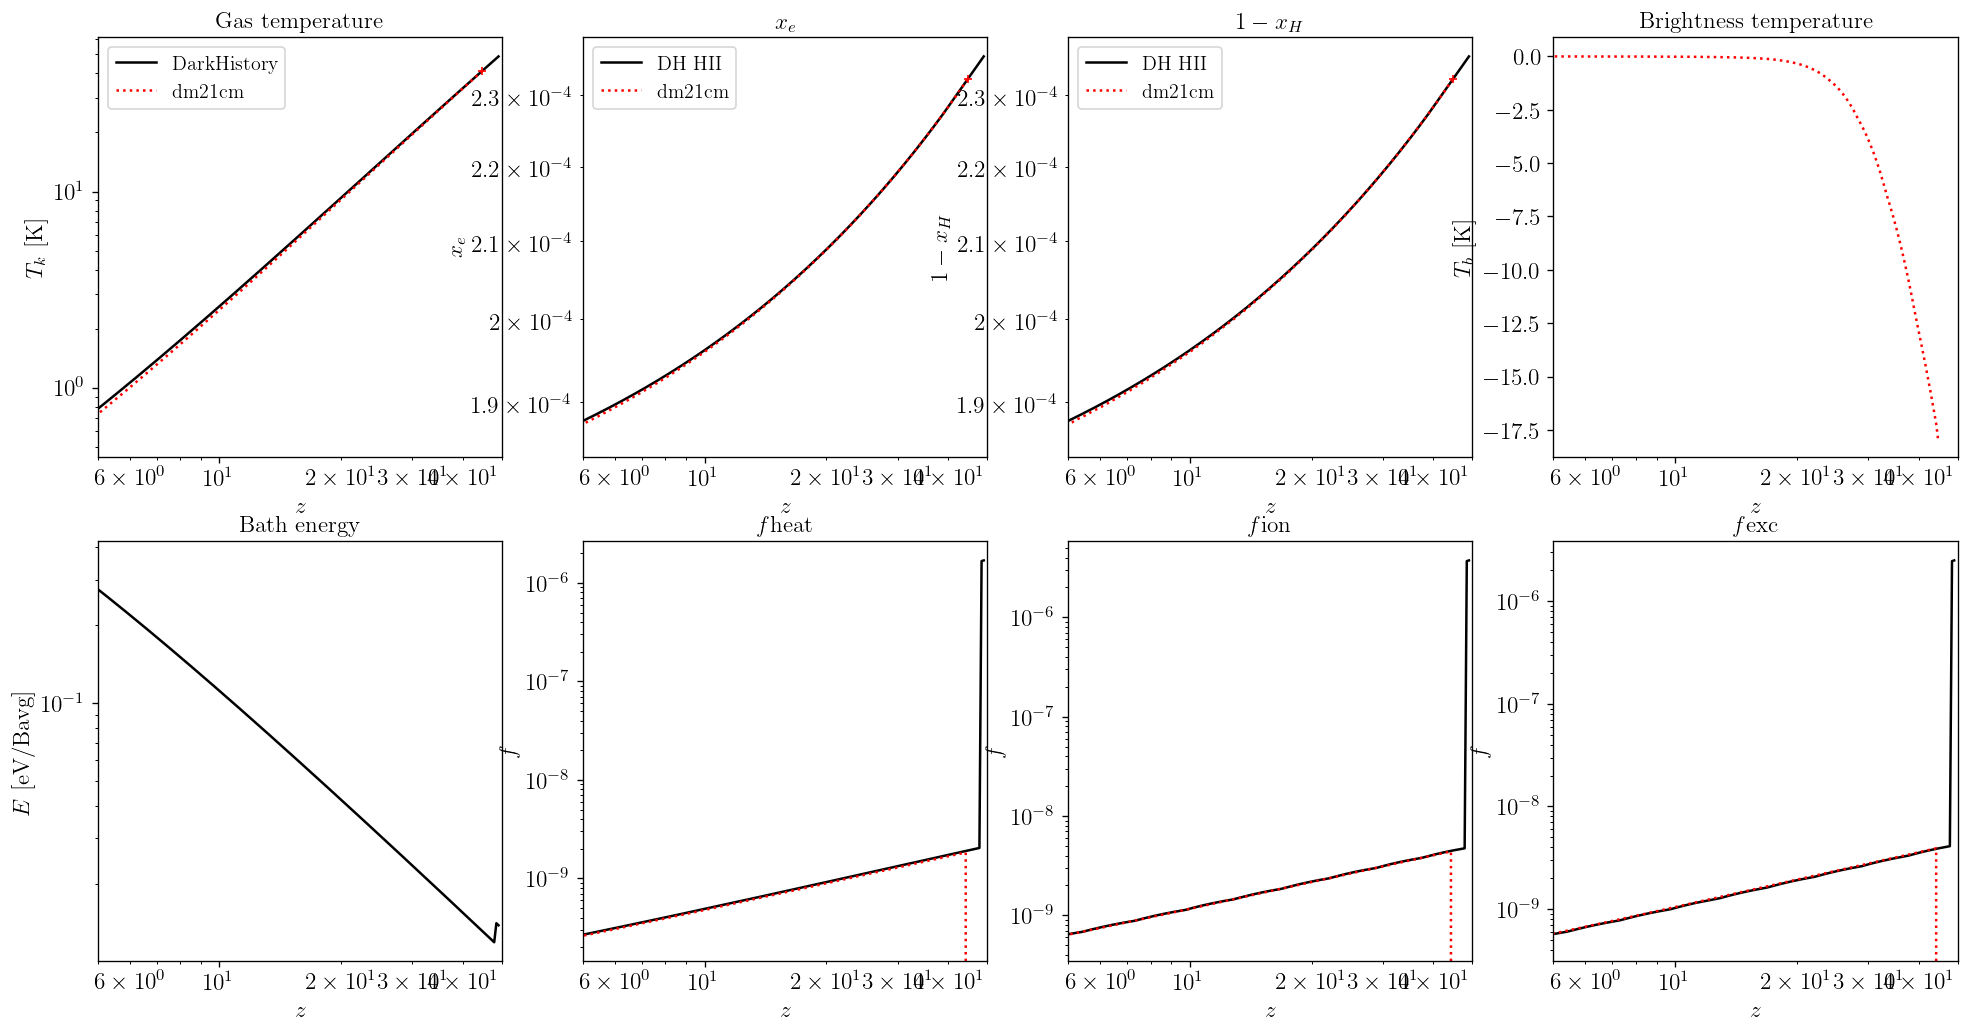

In [8]:
run_name = 'dhc_phph_nobath'
dh_soln = pickle.load(open(f"run_info/{run_name}_dh_soln.p", 'rb'))
run_name = 'dhc_phph_nobath'
soln = np.load(f"run_info/{run_name}_records.npy", allow_pickle=True).item()
plot_global(dh_soln, soln)

In [ ]:
dh_soln['f']['low'].keys()

dict_keys(['H ion', 'He ion', 'exc', 'heat', 'cont'])

In [25]:
zs = np.linspace(5.001, 44.999, 100)
dh_fs = dh_soln['f']['low']['heat'] + dh_soln['f']['high']['heat']
dh_arr = np.interp(1+zs, dh_soln['rs'][::-1], dh_fs[::-1])
p21c_arr = np.interp(zs, soln['z'][::-1], soln['f_heat'][::-1])
(np.abs(p21c_arr-dh_arr)/dh_arr)

array([0.04796567, 0.04811624, 0.04879997, 0.04926871, 0.0496288 ,
       0.04987665, 0.05035695, 0.05094952, 0.05145841, 0.05187376,
       0.05226887, 0.05261937, 0.05320252, 0.05388483, 0.05445557,
       0.05504329, 0.05554001, 0.05603015, 0.05654614, 0.05703548,
       0.05779805, 0.05851389, 0.05923966, 0.05996059, 0.06052929,
       0.06124943, 0.06182639, 0.06255396, 0.06312851, 0.06379826,
       0.06478482, 0.06557215, 0.06635475, 0.0671365 , 0.0679204 ,
       0.06873833, 0.06953342, 0.07031514, 0.0711369 , 0.07197514,
       0.07283253, 0.07371151, 0.07452122, 0.07541922, 0.0764892 ,
       0.07758002, 0.07832802, 0.07933695, 0.08047182, 0.08111292,
       0.08228935, 0.08293218, 0.0841351 , 0.08478728, 0.08602483,
       0.08664322, 0.08796579, 0.08857991, 0.08956206, 0.0907007 ,
       0.09147541, 0.09273322, 0.09371545, 0.09436895, 0.09533946,
       0.0966171 , 0.09721565, 0.09778174, 0.09861251, 0.09985268,
       0.10046168, 0.10090042, 0.101289  , 0.10162259, 0.10236

In [ ]:
zs = np.linspace(5.001, 44.999, 100)
dh_bath_engs = [s.toteng() for s in dh_soln['highengphot']]
dh_arr = np.interp(1+zs, dh_soln['rs'][::-1], dh_bath_engs[::-1])
p21c_arr = np.interp(zs, soln['z'][::-1], soln['E_phot'][::-1])
np.max(np.abs(p21c_arr-dh_arr)/dh_arr)

0.05427165381579362

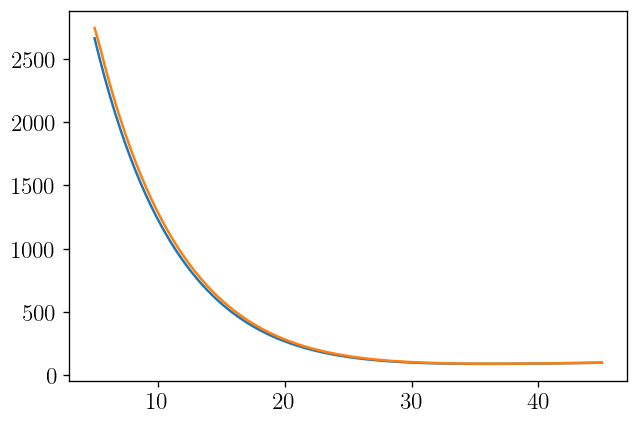

In [ ]:
plt.plot(zs, p21c_arr)
plt.plot(zs, dh_arr)
